In [1]:
import pandas as pd
data = pd.read_excel("灵性.xlsx")
data.head()

,序号,年龄,子女数量,文化程度,生活费用,健康状况,邻里关系,子女关系,心理状况,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,灵性寄托
0,1,60,1.0,1,3.0,2,3.0,4.0,2,0,...,0,0,0,0,1,0,0,NaN,NaN,2
1,2,78,3.0,1,3.0,2,3.0,3.0,3,0,...,0,0,0,0,0,0,1,NaN,NaN,2
2,3,60,1.0,2,2.0,2,3.0,4.0,2,0,...,1,1,0,0,0,0,0,NaN,NaN,4
3,4,65,2.0,3,2.0,2,2.0,2.0,2,0,...,1,0,0,1,0,0,0,NaN,NaN,3
4,5,61,1.0,2,2.0,3,3.0,4.0,2,1,...,0,0,0,0,0,1,0,NaN,NaN,3


In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 24 columns):
序号             945 non-null int64
年龄             945 non-null int64
子女数量           943 non-null float64
文化程度           945 non-null int64
生活费用           943 non-null float64
健康状况           945 non-null int64
邻里关系           943 non-null float64
子女关系           901 non-null float64
心理状况           945 non-null int64
Unnamed: 9     945 non-null int64
Unnamed: 10    945 non-null int64
Unnamed: 11    945 non-null int64
Unnamed: 12    945 non-null int64
Unnamed: 13    0 non-null float64
Unnamed: 14    945 non-null int64
Unnamed: 15    945 non-null int64
Unnamed: 16    945 non-null int64
Unnamed: 17    945 non-null int64
Unnamed: 18    945 non-null int64
Unnamed: 19    945 non-null int64
Unnamed: 20    945 non-null int64
Unnamed: 21    0 non-null float64
Unnamed: 22    0 non-null float64
灵性寄托           945 non-null int64
dtypes: float64(7), int64(17)
memory usage: 177.3 KB
None


In [3]:
features = ['序号', '年龄', '子女数量', '文化程度', '生活费用', '健康状况', '邻里关系', '子女关系', '心理状况', '灵性寄托']
new_data = data[features]
new_data.head()

,序号,年龄,子女数量,文化程度,生活费用,健康状况,邻里关系,子女关系,心理状况,灵性寄托
0,1,60,1.0,1,3.0,2,3.0,4.0,2,2
1,2,78,3.0,1,3.0,2,3.0,3.0,3,2
2,3,60,1.0,2,2.0,2,3.0,4.0,2,4
3,4,65,2.0,3,2.0,2,2.0,2.0,2,3
4,5,61,1.0,2,2.0,3,3.0,4.0,2,3


In [4]:
# 查看每个column缺失值总数和百分比
total = new_data.isnull().sum().sort_values(ascending=False)
percent = (new_data.isnull().sum()/new_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
子女关系,44,0.046561
邻里关系,2,0.002116
生活费用,2,0.002116
子女数量,2,0.002116
灵性寄托,0,0.000000
心理状况,0,0.000000
健康状况,0,0.000000
文化程度,0,0.000000
年龄,0,0.000000
序号,0,0.000000


In [5]:
train_data = new_data.fillna(new_data.median())
train_data = train_data.astype(int)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 10 columns):
序号      945 non-null int64
年龄      945 non-null int64
子女数量    945 non-null int64
文化程度    945 non-null int64
生活费用    945 non-null int64
健康状况    945 non-null int64
邻里关系    945 non-null int64
子女关系    945 non-null int64
心理状况    945 non-null int64
灵性寄托    945 non-null int64
dtypes: int64(10)
memory usage: 73.9 KB


In [6]:
print(train_data['子女数量'].unique())
print(train_data['文化程度'].unique())
print(train_data['生活费用'].unique())
print(train_data['健康状况'].unique())
print(train_data['邻里关系'].unique())
print(train_data['子女关系'].unique())
print(train_data['心理状况'].unique())
print(train_data['灵性寄托'].unique())

[ 1  3  2  0  4  5  6  7 11]
[1 2 3 5 4 0]
[3 2 4 5 1 0]
[2 3 1 0 4]
[3 2 0 1 4 5]
[ 4  3  2  0  5  1 41]
[2 3 1 0 4]
[ 2  4  3  6  5 10  1  7  8  9 11]


In [7]:
for indexs in train_data.index:
    #print(train_data.iloc[indexs]['子女关系'])
    if(train_data.iloc[indexs]['子女关系'] == 41):
        train_data.iloc[indexs]['子女关系'] = train_data['子女关系'].median()

In [8]:
print(train_data['子女关系'].unique())

[4 3 2 0 5 1]


In [9]:
# 查看每个column缺失值总数和百分比
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
灵性寄托,0,0.0
心理状况,0,0.0
子女关系,0,0.0
邻里关系,0,0.0
健康状况,0,0.0
生活费用,0,0.0
文化程度,0,0.0
子女数量,0,0.0
年龄,0,0.0
序号,0,0.0


In [10]:
# 用corr()计算出各列与'灵性寄托'的相关性
traindata_corr = train_data.corr()['灵性寄托'][:-1]
golden_feature_list = traindata_corr[abs(traindata_corr) > 0].sort_values(ascending = False)
print("Below are {} correlated values with 灵性寄托:\n{}".format(len(golden_feature_list), golden_feature_list))

Below are 9 correlated values with 灵性寄托:
心理状况    0.133859
邻里关系    0.091210
健康状况    0.083529
年龄      0.017021
生活费用   -0.002628
子女数量   -0.005715
序号     -0.009964
子女关系   -0.047378
文化程度   -0.189216
Name: 灵性寄托, dtype: float64


In [11]:
print(train_data['年龄'].unique())
print(train_data['灵性寄托'].unique())

[60 78 65 61 72 67 68 63 69 64 62 70 66 76 88 81 77 75 73 79 71 74 80 83 84
 87 85 86 82 90 89 91 92 95]
[ 2  4  3  6  5 10  1  7  8  9 11]


In [38]:
data1 = train_data[train_data['灵性寄托'] == 1]
for i in range(11):
    i += 1
    name = 'data' + str(i)
    print(name)
    name = train_data[train_data['灵性寄托'] == i] 


NameError: name 'data2' is not defined

In [14]:
data1.shape

(8, 10)

In [19]:
# 用corr()计算出各列与'灵性寄托'的相关性
traindata_corr = data1.corr()['灵性寄托'][:-1]
golden_feature_list = traindata_corr[abs(traindata_corr) > 0].sort_values(ascending = False)
print("Below are {} correlated values with 灵性寄托:\n{}".format(len(golden_feature_list), golden_feature_list))

Below are 0 correlated values with 灵性寄托:
Series([], Name: 灵性寄托, dtype: float64)


In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
#import xgboost as xgb
from sklearn.linear_model import LinearRegression 

traindata_corrheatmap = data1.corr()
cols = traindata_corrheatmap.nlargest(10, '灵性寄托')['灵性寄托'].index
cm = np.corrcoef(data1[cols].values.T)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
            annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

ValueError: zero-size array to reduction operation minimum which has no identity

In [21]:
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew

/home/hankin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/hankin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


LinAlgError: singular matrix

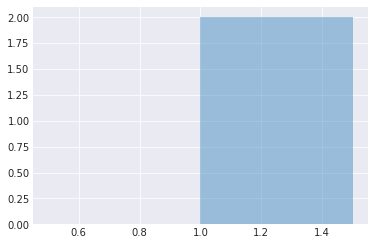

In [22]:
sns.distplot(data1['灵性寄托'],fit=norm)

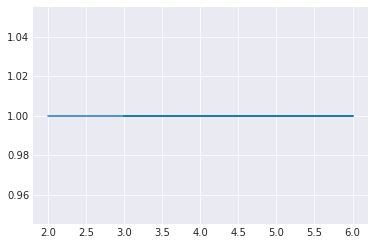

In [23]:
plt.plot(data1['子女数量'],data1['灵性寄托'])
plt.show()

In [24]:
data1

,序号,年龄,子女数量,文化程度,生活费用,健康状况,邻里关系,子女关系,心理状况,灵性寄托
94,110,61,2,2,3,2,1,0,0,1
515,584,63,4,1,2,1,2,3,0,1
609,681,74,4,1,5,2,1,3,1,1
764,842,76,6,1,2,3,2,4,1,1
768,846,76,6,1,2,1,2,5,1,1
797,889,71,3,2,2,2,1,5,2,1
807,900,78,4,2,2,2,1,5,1,1
808,901,83,4,1,1,1,2,5,2,1


In [80]:
data2 = train_data[train_data['灵性寄托'] == 9]
data2

,序号,年龄,子女数量,文化程度,生活费用,健康状况,邻里关系,子女关系,心理状况,灵性寄托
174,198,75,4,1,3,3,3,4,2,9
175,199,78,4,1,4,2,2,3,3,9
176,200,78,5,1,2,2,2,5,2,9
181,205,66,6,1,3,4,3,4,2,9
186,210,77,5,1,4,3,2,3,2,9
187,211,66,5,1,3,3,2,3,2,9
197,221,66,1,1,4,2,2,3,3,9
227,251,86,3,1,3,3,3,3,3,9
247,272,75,3,1,3,3,1,2,2,9
300,329,67,3,1,3,2,3,2,3,9


In [28]:
traindata_corr = np.corrcoef(data1)
print(traindata_corr)

[[ 1.          0.91244671  0.91271437  0.90504382  0.90489066  0.90068213
   0.90366513  0.9060068 ]
 [ 0.91244671  1.          0.99998646  0.99983808  0.99983472  0.99959979
   0.99977345  0.99987396]
 [ 0.91271437  0.99998646  1.          0.99981796  0.99981065  0.99958098
   0.99975515  0.9998522 ]
 [ 0.90504382  0.99983808  0.99981796  1.          0.99999611  0.99993857
   0.99998892  0.99998935]
 [ 0.90489066  0.99983472  0.99981065  0.99999611  1.          0.99994171
   0.99999003  0.99999165]
 [ 0.90068213  0.99959979  0.99958098  0.99993857  0.99994171  1.
   0.99997493  0.99991835]
 [ 0.90366513  0.99977345  0.99975515  0.99998892  0.99999003  0.99997493
   1.          0.99998077]
 [ 0.9060068   0.99987396  0.9998522   0.99998935  0.99999165  0.99991835
   0.99998077  1.        ]]


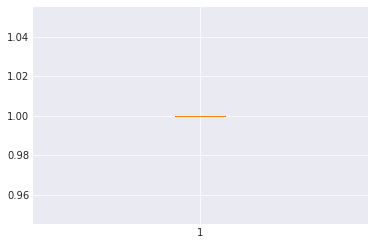

In [25]:
plt.boxplot(data1['灵性寄托'])
plt.show()

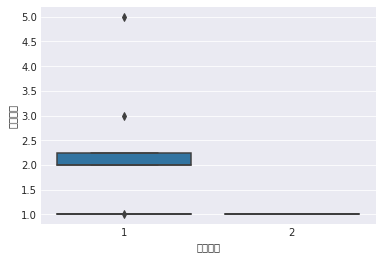

In [27]:
sns.boxplot(x='灵性寄托', y='生活费用', data=data1)

sns.boxplot(x='子女数量', y='灵性寄托', data=data1)

sns.boxplot(x='子女关系', y='灵性寄托', data=data1)

sns.boxplot(x='文化程度', y='灵性寄托', data=data1)

In [43]:
print(train_data['年龄'].unique())

[60 78 65 61 72 67 68 63 69 64 62 70 66 76 88 81 77 75 73 79 71 74 80 83 84
 87 85 86 82 90 89 91 92 95]


In [44]:
data60 = train_data[train_data['年龄'] == 60]
data60

,序号,年龄,子女数量,文化程度,生活费用,健康状况,邻里关系,子女关系,心理状况,灵性寄托
0,1,60,1,1,3,2,3,4,2,2
2,3,60,1,2,2,2,3,4,2,4
5,6,60,0,5,3,1,2,0,1,2
11,15,60,1,1,2,2,2,2,3,5
14,20,60,1,2,2,1,2,5,1,3
27,36,60,1,2,3,3,2,3,1,2
47,58,60,1,2,5,2,2,4,2,3
66,79,60,1,3,4,2,3,4,1,4
72,87,60,1,1,4,2,1,4,2,3
75,90,60,2,2,4,1,1,5,2,3


In [46]:
data95 = train_data[train_data['年龄'] == 80]
data95

,序号,年龄,子女数量,文化程度,生活费用,健康状况,邻里关系,子女关系,心理状况,灵性寄托
113,131,80,2,2,3,3,2,3,2,3
136,160,80,5,1,4,3,4,2,2,2
209,233,80,5,1,3,3,3,3,2,4
239,264,80,5,1,3,2,2,2,2,3
285,310,80,11,1,1,2,2,5,2,3
286,311,80,3,1,5,2,3,2,3,2
287,312,80,0,5,5,4,1,4,1,2
289,314,80,4,1,3,2,2,2,2,6
298,327,80,5,1,3,2,2,4,2,4
331,380,80,2,1,3,2,2,5,3,2


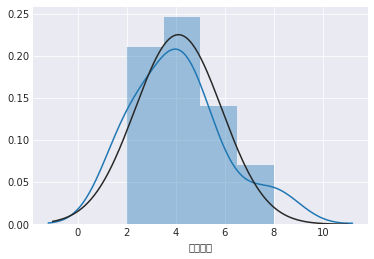

In [76]:
data8 = train_data[train_data['子女数量'] == 0]
data8
data8 = train_data[train_data['心理状况'] == 4]
data8
#data8 = train_data[train_data['生活费用'] == 5]
#data8 = train_data[train_data['邻里关系'] == 4]
#data8 = train_data[train_data['健康状况'] == 4]
#data8
sns.distplot(data8['灵性寄托'],fit=norm)

In [74]:
data1

,序号,年龄,子女数量,文化程度,生活费用,健康状况,邻里关系,子女关系,心理状况,灵性寄托
94,110,61,2,2,3,2,1,0,0,1
515,584,63,4,1,2,1,2,3,0,1
609,681,74,4,1,5,2,1,3,1,1
764,842,76,6,1,2,3,2,4,1,1
768,846,76,6,1,2,1,2,5,1,1
797,889,71,3,2,2,2,1,5,2,1
807,900,78,4,2,2,2,1,5,1,1
808,901,83,4,1,1,1,2,5,2,1


In [81]:
new_data

,序号,年龄,子女数量,文化程度,生活费用,健康状况,邻里关系,子女关系,心理状况,灵性寄托
0,1,60,1.0,1,3.0,2,3.0,4.0,2,2
1,2,78,3.0,1,3.0,2,3.0,3.0,3,2
2,3,60,1.0,2,2.0,2,3.0,4.0,2,4
3,4,65,2.0,3,2.0,2,2.0,2.0,2,3
4,5,61,1.0,2,2.0,3,3.0,4.0,2,3
5,6,60,0.0,5,3.0,1,2.0,0.0,1,2
6,8,65,1.0,4,3.0,2,2.0,4.0,2,6
7,11,72,2.0,2,3.0,2,3.0,4.0,2,2
8,12,65,2.0,1,3.0,3,2.0,5.0,2,2
9,13,67,1.0,4,3.0,2,2.0,4.0,1,2
